In [1]:
import os
import nibabel as nb
import numpy as np
import pandas as pd
from scipy import ndimage
import h5py
import matplotlib.pyplot as plt
import seaborn as sea
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, StackingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.svm import LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb

In [2]:
def unison_shuffled_copies(a, b, c):
    assert len(a) == len(b) == len(c)
    p = np.random.permutation(len(a))
    return a[p], b[p], c[p], p


X_shfl = np.load('output/X_shfl.npz')['data']
ac_shfl = np.load('output/ac_shfl.npz')['data']
cc_shfl = np.load('output/cc_shfl.npz')['data']
X_cv, ac_cv, cc_cv, order = unison_shuffled_copies(X_shfl, ac_shfl, cc_shfl)
X_tfce_shfl = np.load('output/X_tfce_shfl.npy')
tc_shfl = np.load('output/tfce_cutoff_shfl.npy')
X_tfce_shfl, tc_shfl, _, order = unison_shuffled_copies(X_tfce_shfl, tc_shfl, tc_shfl)

regr_dict = {'RandomForest': RandomForestRegressor(n_jobs=6, max_depth=7),
             'XGBoost': xgb.XGBRegressor(n_jobs=6),
             'AdaBoost': AdaBoostRegressor(),
             'KNR': KNeighborsRegressor(),
             'LR':LinearRegression(),
             'Ridge':Ridge()}

ac_cv_dict = {}
for regr in regr_dict:
    print(f'{regr};', end='')
    ac_cv_dict[regr] = cross_validate(regr_dict[regr], X_cv, ac_cv, cv=10, scoring=['r2', 'neg_mean_absolute_error'])


ac_r2_scores = np.empty((6,10))
ac_r2_scores[0,:] = ac_cv_dict['LR']['test_r2']
ac_r2_scores[1,:] = ac_cv_dict['Ridge']['test_r2']
ac_r2_scores[2,:] = ac_cv_dict['KNR']['test_r2']
ac_r2_scores[3,:] = ac_cv_dict['RandomForest']['test_r2']
ac_r2_scores[4,:] = ac_cv_dict['AdaBoost']['test_r2']
ac_r2_scores[5,:] = ac_cv_dict['XGBoost']['test_r2']

ac_rmse_scores = np.empty((6,10))
ac_rmse_scores[0,:] = ac_cv_dict['LR']['test_neg_mean_absolute_error']
ac_rmse_scores[1,:] = ac_cv_dict['Ridge']['test_neg_mean_absolute_error']
ac_rmse_scores[2,:] = ac_cv_dict['KNR']['test_neg_mean_absolute_error']
ac_rmse_scores[3,:] = ac_cv_dict['RandomForest']['test_neg_mean_absolute_error']
ac_rmse_scores[4,:] = ac_cv_dict['AdaBoost']['test_neg_mean_absolute_error']
ac_rmse_scores[5,:] = ac_cv_dict['XGBoost']['test_neg_mean_absolute_error']

cc_cv_dict = {}
for regr in regr_dict:
    print(f'{regr};', end='')
    cc_cv_dict[regr] = cross_validate(regr_dict[regr], X_cv, cc_cv, cv=10, scoring=['r2', 'neg_mean_absolute_error'])


cc_r2_scores = np.empty((6,10))
cc_r2_scores[0,:] = cc_cv_dict['LR']['test_r2']
cc_r2_scores[1,:] = cc_cv_dict['Ridge']['test_r2']
cc_r2_scores[2,:] = cc_cv_dict['KNR']['test_r2']
cc_r2_scores[3,:] = cc_cv_dict['RandomForest']['test_r2']
cc_r2_scores[4,:] = cc_cv_dict['AdaBoost']['test_r2']
cc_r2_scores[5,:] = cc_cv_dict['XGBoost']['test_r2']

cc_rmse_scores = np.empty((6,10))
cc_rmse_scores[0,:] = cc_cv_dict['LR']['test_neg_mean_absolute_error']
cc_rmse_scores[1,:] = cc_cv_dict['Ridge']['test_neg_mean_absolute_error']
cc_rmse_scores[2,:] = cc_cv_dict['KNR']['test_neg_mean_absolute_error']
cc_rmse_scores[3,:] = cc_cv_dict['RandomForest']['test_neg_mean_absolute_error']
cc_rmse_scores[4,:] = cc_cv_dict['AdaBoost']['test_neg_mean_absolute_error']
cc_rmse_scores[5,:] = cc_cv_dict['XGBoost']['test_neg_mean_absolute_error']

tc_cv_dict = {}
for regr in regr_dict:
    print(f'{regr};', end='')
    tc_cv_dict[regr] = cross_validate(regr_dict[regr], X_tfce_shfl, tc_shfl, cv=10, scoring=['r2', 'neg_mean_absolute_error'])


tc_r2_scores = np.empty((6,10))
tc_r2_scores[0,:] = tc_cv_dict['LR']['test_r2']
tc_r2_scores[1,:] = tc_cv_dict['Ridge']['test_r2']
tc_r2_scores[2,:] = tc_cv_dict['KNR']['test_r2']
tc_r2_scores[3,:] = tc_cv_dict['RandomForest']['test_r2']
tc_r2_scores[4,:] = tc_cv_dict['AdaBoost']['test_r2']
tc_r2_scores[5,:] = tc_cv_dict['XGBoost']['test_r2']

tc_rmse_scores = np.empty((6,10))
tc_rmse_scores[0,:] = tc_cv_dict['LR']['test_neg_mean_absolute_error']
tc_rmse_scores[1,:] = tc_cv_dict['Ridge']['test_neg_mean_absolute_error']
tc_rmse_scores[2,:] = tc_cv_dict['KNR']['test_neg_mean_absolute_error']
tc_rmse_scores[3,:] = tc_cv_dict['RandomForest']['test_neg_mean_absolute_error']
tc_rmse_scores[4,:] = tc_cv_dict['AdaBoost']['test_neg_mean_absolute_error']
tc_rmse_scores[5,:] = tc_cv_dict['XGBoost']['test_neg_mean_absolute_error']



RandomForest;XGBoost;AdaBoost;KNR;LR;Ridge;RandomForest;XGBoost;AdaBoost;KNR;LR;Ridge;RandomForest;XGBoost;AdaBoost;KNR;LR;Ridge;

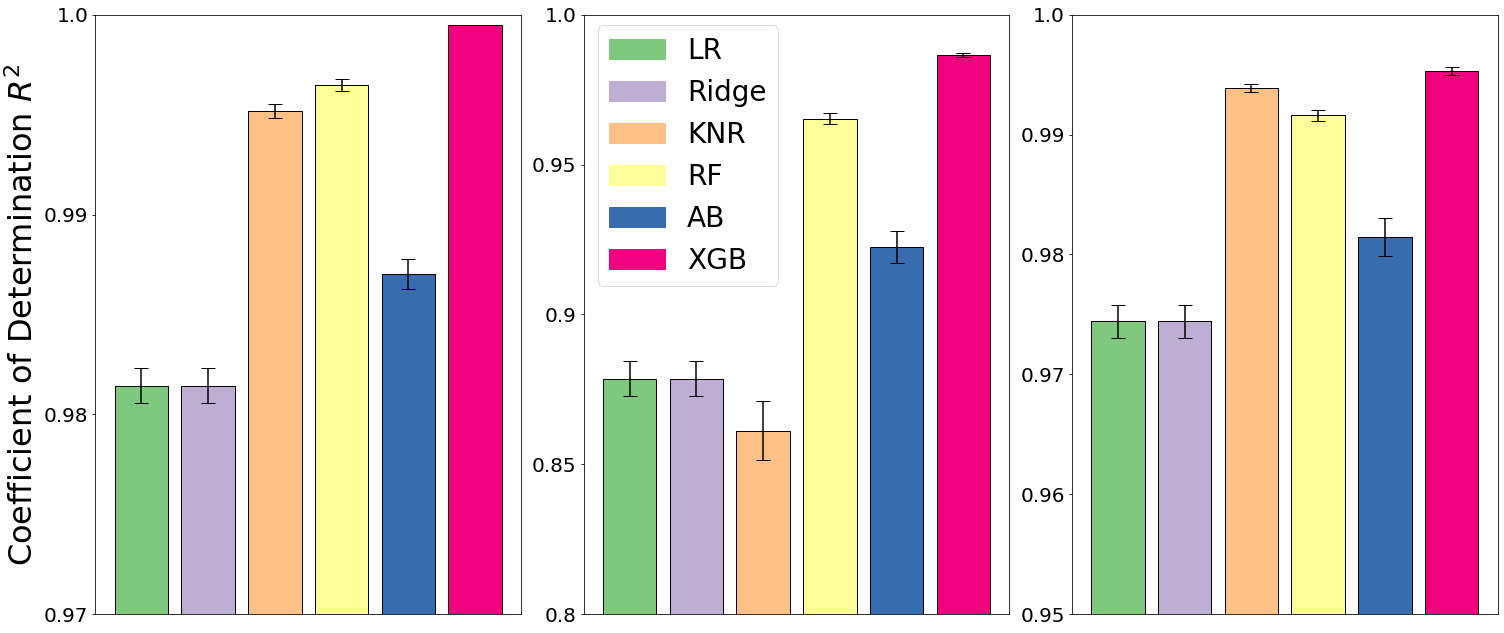

In [3]:
my_cmap = plt.get_cmap("Accent")
fig, ax = plt.subplots(1,3,figsize=(21,9))

barWidth = 0.8
 
bars1 = np.average(ac_r2_scores, axis=1)
bars2 = np.average(cc_r2_scores, axis=1)
bars3 = np.average(tc_r2_scores, axis=1)
 
yer1 = np.std(ac_r2_scores, axis=1)
yer2 = np.std(cc_r2_scores, axis=1)
yer3 = np.std(tc_r2_scores, axis=1)
 
# The x position of bars
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
 
# Create blue bars
ax[0].bar(r1, bars1, width = barWidth, color = my_cmap.colors, edgecolor = 'black', yerr=yer1, capsize=7)
ax[0].set_ylim(0.97,1.0)
ax[0].set_xticks([])
ax[0].set_ylabel('Coefficient of Determination $R^2$', fontsize=32)
ax[0].set_yticks(np.arange(0.97,1.0,0.01))
ax[0].set_yticklabels(np.arange(0.97,1.0,0.01), fontsize=20)

# Create cyan bars
ax[1].bar(r1, bars2, width = barWidth, color = my_cmap.colors, edgecolor = 'black', yerr=yer2, capsize=7)
ax[1].set_ylim(0.8,1.0)
ax[1].set_xticks([])
ax[1].set_yticks(np.arange(0.8,1.01,0.05))
ax[1].set_yticklabels(np.round(np.arange(0.8,1.01,0.05),3), fontsize=20)

# Create cyan bars
ax[2].bar(r1, bars3, width = barWidth, color = my_cmap.colors, edgecolor = 'black', yerr=yer3, capsize=7)
ax[2].set_ylim(0.95,1.0)
ax[2].set_xticks([])
ax[2].set_yticks(np.arange(0.95,1.0,0.01))
ax[2].set_yticklabels(np.round(np.arange(0.95,1.0,0.01),3), fontsize=20)

labels=['LR','Ridge','KNR','RF','AB','XGB']
handles = [plt.Rectangle((0,0),1,1, color=my_cmap.colors[i]) for i,label in enumerate(labels)]
ax[1].legend(handles, labels, fontsize=28, loc='center left', bbox_to_anchor=(0, 0.765))

fig.tight_layout()

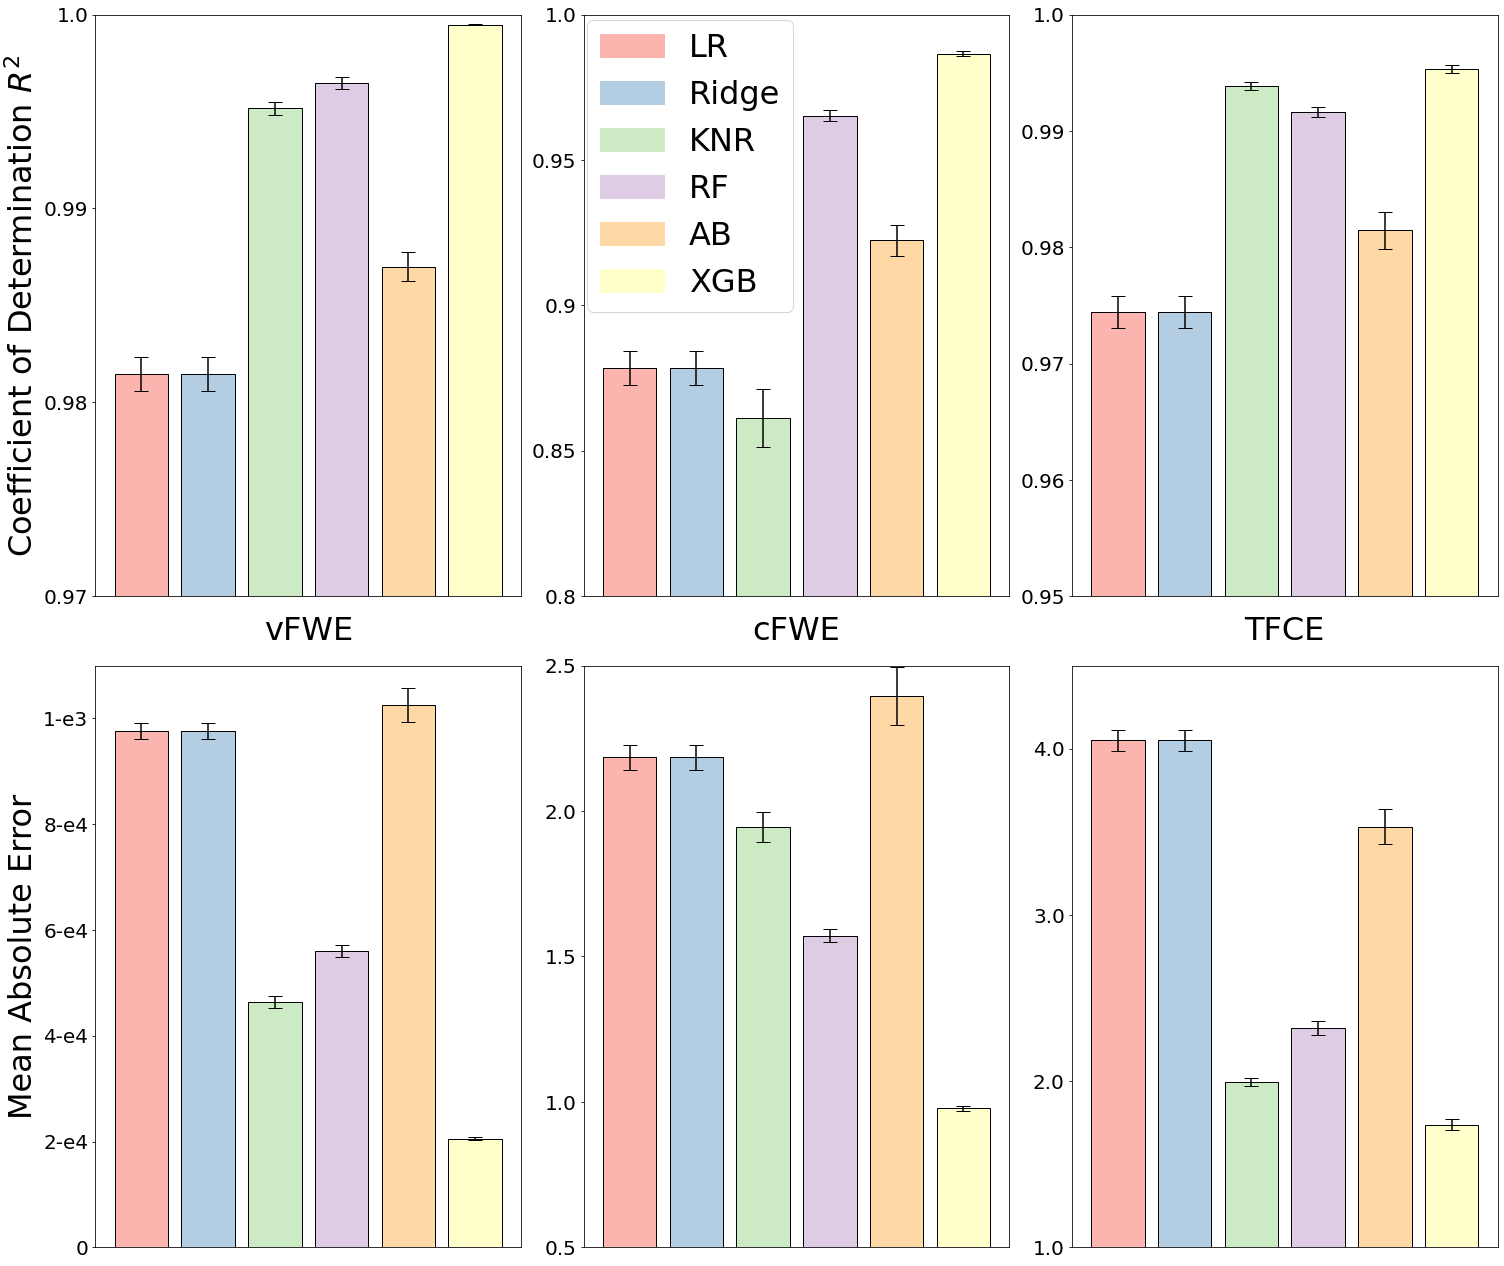

In [8]:
my_cmap = plt.get_cmap("Pastel1")
fig, ax = plt.subplots(2,3,figsize=(21,18))

barWidth = 0.8
 
bars1 = np.average(ac_r2_scores, axis=1)
bars2 = np.average(cc_r2_scores, axis=1)
bars3 = np.average(tc_r2_scores, axis=1)
 
yer1 = np.std(ac_r2_scores, axis=1)
yer2 = np.std(cc_r2_scores, axis=1)
yer3 = np.std(tc_r2_scores, axis=1)
 
# The x position of bars
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
 
# Create blue bars
ax[0,0].bar(r1, bars1, width = barWidth, color = my_cmap.colors, edgecolor = 'black', yerr=yer1, capsize=7)
ax[0,0].set_ylim(0.97,1.0)
ax[0,0].set_xticks([])
ax[0,0].set_xlabel('vFWE', fontsize=32, labelpad=20)
ax[0,0].set_ylabel('Coefficient of Determination $R^2$', fontsize=32)
ax[0,0].set_yticks(np.arange(0.97,1.0,0.01))
ax[0,0].set_yticklabels(np.arange(0.97,1.0,0.01), fontsize=20)

# Create cyan bars
ax[0,1].bar(r1, bars2, width = barWidth, color = my_cmap.colors, edgecolor = 'black', yerr=yer2, capsize=7)
ax[0,1].set_ylim(0.8,1.0)
ax[0,1].set_xticks([])
ax[0,1].set_xlabel('cFWE', fontsize=32, labelpad=20)
ax[0,1].set_yticks(np.arange(0.8,1.01,0.05))
ax[0,1].set_yticklabels(np.round(np.arange(0.8,1.01,0.05),3), fontsize=20)

# Create cyan bars
ax[0,2].bar(r1, bars3, width = barWidth, color = my_cmap.colors, edgecolor = 'black', yerr=yer3, capsize=7)
ax[0,2].set_ylim(0.95,1.0)
ax[0,2].set_xticks([])
ax[0,2].set_xlabel('TFCE', fontsize=32, labelpad=20)
ax[0,2].set_yticks(np.arange(0.95,1.0,0.01))
ax[0,2].set_yticklabels(np.round(np.arange(0.95,1.0,0.01),3), fontsize=20)

 
bars1 = np.average(ac_rmse_scores, axis=1)*-1
bars2 = np.average(cc_rmse_scores, axis=1)*-1
bars3 = np.average(tc_rmse_scores, axis=1)*-1
 
yer1 = np.std(ac_rmse_scores, axis=1)
yer2 = np.std(cc_rmse_scores, axis=1)
yer3 = np.std(tc_rmse_scores, axis=1)
 
# The x position of bars
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
 
# Create blue bars
ax[1,0].bar(r1, bars1, width = barWidth, color = my_cmap.colors, edgecolor = 'black', yerr=yer1, capsize=7)
ax[1,0].set_ylim(0,0.0011)
ax[1,0].set_xticks([])
ax[1,0].set_ylabel('Mean Absolute Error', fontsize=32)
ax[1,0].set_yticks(np.round(np.arange(0,0.0011,0.0002),5))
ax[1,0].set_yticklabels(['0','2-e4','4-e4','6-e4','8-e4','1-e3'], fontsize=20)

# Create cyan bars
ax[1,1].bar(r1, bars2, width = barWidth, color = my_cmap.colors, edgecolor = 'black', yerr=yer2, capsize=7)
ax[1,1].set_ylim(0.5,2.5)
ax[1,1].set_xticks([])
ax[1,1].set_yticks(np.arange(0.5,2.51,0.5))
ax[1,1].set_yticklabels(np.arange(0.5,2.51,0.5), fontsize=20)

# Create cyan bars
ax[1,2].bar(r1, bars3, width = barWidth, color = my_cmap.colors, edgecolor = 'black', yerr=yer3, capsize=7)
ax[1,2].set_ylim(1,4.5)
ax[1,2].set_xticks([])
ax[1,2].set_yticks(np.arange(1,4.6,1))
ax[1,2].set_yticklabels(np.arange(1,4.5,1), fontsize=20)

labels=['LR','Ridge','KNR','RF','AB','XGB']
handles = [plt.Rectangle((0,0),1,1, color=my_cmap.colors[i]) for i,label in enumerate(labels)]
ax[0,1].legend(handles, labels, fontsize=32, loc='center left', bbox_to_anchor=(-0.03,0.74))

fig.tight_layout()